In [1]:
"""
This is a skeleton code to our project
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error 

In [2]:
Features = pd.read_csv('final2.csv')
Label = pd.read_csv('label.csv')
Label['label'] = Label['label'].fillna(0)
Spotify = pd.concat((Features,Label['label']),axis=1)
Spotify = Spotify.drop(Spotify.columns[0], axis=1)

In [3]:
Spotify.describe()

,track_length,compression_rate,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,artist_name_yo gotti,artist_name_yo la tengo,artist_name_yolanda adams,artist_name_youngbloodz,artist_name_z-ro,artist_name_zac brown band,artist_name_zero 7,artist_name_ziggy marley,artist_name_zz top,label
count,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,...,5274.000000,5274.000000,5274.000000,5274.00000,5274.00000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000
mean,2.849640,0.602267,0.551209,12.350790,0.624554,0.038837,-1.902604,-8.405577,0.067301,121.005184,...,0.000379,0.000569,0.001327,0.00019,0.00019,0.004930,0.004551,0.003792,0.007016,0.271521
std,1.523678,0.095441,0.147732,0.287691,0.235856,0.134479,0.673250,3.850799,0.079855,29.820357,...,0.019472,0.023846,0.036411,0.01377,0.01377,0.070046,0.067311,0.061470,0.083472,0.444786
min,1.000000,0.328025,0.127000,10.401441,0.014200,0.000000,-4.154095,-25.010000,0.022800,37.114000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.529988,0.451000,12.196022,0.448000,0.000000,-2.351775,-10.875250,0.032300,97.502500,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.604357,0.558000,12.352249,0.656000,0.000021,-2.063568,-7.666000,0.041700,119.707500,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.671503,0.655000,12.507301,0.822000,0.002497,-1.427116,-5.411250,0.066075,140.034000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,15.000000,0.961694,0.986000,14.160837,0.997000,0.940000,-0.010050,-0.026000,0.945000,216.051000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature selection

In [55]:
CVscore = []
Accuracy = []

for i in range(1,476):
    
    feature = X_train.columns[0:i]
    #CV score
    CV_scores = cross_val_score(LR_Model, X_train[feature], y_train, cv=2,scoring='accuracy')
    CVscore.append(CV_scores.mean())

    #Predict test set
    LR_Model.fit(X_train[feature], y_train)
    LR_Predict = LR_Model.predict(X_test[feature])
    LR_Accuracy = accuracy_score(y_test, LR_Predict)
    Accuracy.append(LR_Accuracy)
    i += 1

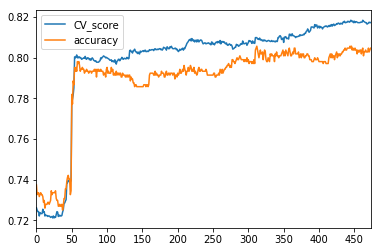

In [71]:
N_Features = pd.DataFrame(
    {'CV_score': CVscore,
     'accuracy': Accuracy,
    })
Features = N_Features.plot.line()
Features.xaxis.set_ticks(np.arange(0,467,50))

In [72]:
N_Features[50:100]

,CV_score,accuracy
50,0.777672,0.781991
51,0.779805,0.777251
52,0.781702,0.788626
53,0.785257,0.786730
54,0.800426,0.795261
55,0.799952,0.793365
56,0.800426,0.795261
57,0.801374,0.793365
58,0.799952,0.798104
59,0.800426,0.797156


In [4]:
#Split training set and testing set at 80% to 20%
training = Spotify.sample(frac = 0.8,random_state = 1)

X_train = training.loc[:, training.columns != 'label']
y_train = training['label']
X_test = Spotify.drop(training.index).loc[:, training.columns != 'label']
y_test = Spotify.drop(training.index)['label']

In [5]:
Num_Features = ['track_length', 'compression_rate', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'senti_%+', 'senti_%=', 'senti_%-',
       'senti_total', 'duration_min', 'len_track_name']
Lyric_Features = ['track_length','compression_rate', 'senti_%+', 'senti_%=', 'senti_%-','senti_total','len_track_name']

In [6]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
selector.fit(X_train)
variance_features = X_train[X_train.columns[selector.get_support(indices=True)]].columns
variance_features

Index(['track_length', 'liveness', 'loudness', 'tempo', 'senti_%+', 'senti_%=',
       'senti_%-', 'senti_total', 'key_A', 'key_C', 'key_G', 'mode_Major',
       'mode_Minor', 'genre_rock'],
      dtype='object')

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train1 = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
#negative values (loudness, sentiment score) are taken out to use chi2

selector = SelectKBest(chi2, k=60)
selector.fit(X_train1,y_train)
Chi2_features = X_train1[X_train1.columns[selector.get_support(indices=True)]].columns
Chi2_features

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Index(['compression_rate', 'instrumentalness', 'label_acou_3/4', 'key_C#',
       'mode_Minor', 'time_signature_3/4', 'genre_alternative', 'genre_blues',
       'genre_comedy', 'genre_country', 'genre_electronic', 'genre_folk',
       'genre_hip-hop', 'genre_jazz', 'genre_pop', 'genre_rap', 'genre_reggae',
       'genre_rock', 'genre_ska', 'genre_world', 'artist_name_adam sandler',
       'artist_name_adele', 'artist_name_aerosmith',
       'artist_name_ariana grande', 'artist_name_billie holiday',
       'artist_name_bon jovi', 'artist_name_bruno mars',
       'artist_name_coldplay', 'artist_name_creedence clearwater revival',
       'artist_name_drake', 'artist_name_ed sheeran',
       'artist_name_elvis presley', 'artist_name_face to face',
       'artist_name_green day', 'artist_name_journey',
       'artist_name_justin bieber', 'artist_name_kanye west',
       'artist_name_kenny chesney', 'artist_name_kiss',
       'artist_name_linkin park', 'artist_name_lorde',
       'artist_nam

In [74]:
clf = RandomForestClassifier(n_estimators=1000, random_state=1)
clf.fit(X_train, y_train)

feat_labels = X_train.columns
Importance = []
for feature in zip(feat_labels, clf.feature_importances_):
    Importance.append(feature)

sorted_by_importance = sorted(Importance, key=lambda tup: tup[1], reverse=True)
RandomForest_features = sorted_by_importance[0:60]
RandomForest_features_list = [x[0] for x in RandomForest_features]
RandomForest_features_list

['genre_pop',
 'genre_rock',
 'compression_rate',
 'loudness',
 'energy',
 'duration_ms',
 'valence',
 'danceability',
 'tempo',
 'liveness',
 'speechiness',
 'senti_%=',
 'instrumentalness',
 'senti_%+',
 'senti_total',
 'senti_%-',
 'track_length',
 'genre_blues',
 'artist_name_drake',
 'genre_country',
 'genre_rap',
 'mode_Minor',
 'mode_Major',
 'key_C',
 'genre_dance',
 'key_G',
 'key_A',
 'key_D',
 'artist_name_one direction',
 'key_B',
 'key_C#',
 'key_F',
 'artist_name_twenty one pilots',
 'genre_folk',
 'key_E',
 'key_F#',
 'genre_children’s music',
 'genre_ska',
 'key_A#',
 'key_G#',
 'genre_r&b',
 'genre_reggae',
 'artist_name_adele',
 'artist_name_red hot chili peppers',
 'artist_name_coldplay',
 'genre_world',
 'artist_name_bruno mars',
 'key_D#',
 'artist_name_rihanna',
 'artist_name_the weeknd',
 'genre_hip-hop',
 'genre_soul',
 'time_signature_4/4',
 'artist_name_linkin park',
 'artist_name_radiohead',
 'label_acou_4/4',
 'genre_alternative',
 'artist_name_ariana grande

In [75]:
from sklearn.feature_selection import RFE

estimator = LogisticRegression(penalty='l2',solver='lbfgs',max_iter = 10000)
selector = RFE(estimator, 60, step=10)

selector.fit(X_train,y_train)
RFE_features = X_train[X_train.columns[selector.get_support(indices=True)]].columns
RFE_features

Index(['compression_rate', 'instrumentalness', 'genre_alternative',
       'genre_blues', 'genre_classical', 'genre_country', 'genre_electronic',
       'genre_movie', 'genre_pop', 'genre_rap', 'genre_reggae', 'genre_rock',
       'genre_world', 'artist_name_adele', 'artist_name_aerosmith',
       'artist_name_ariana grande', 'artist_name_bruno mars',
       'artist_name_chuck berry', 'artist_name_coldplay',
       'artist_name_creedence clearwater revival',
       'artist_name_dave matthews band', 'artist_name_drake',
       'artist_name_ellie goulding', 'artist_name_elvis presley',
       'artist_name_europe', 'artist_name_face to face',
       'artist_name_fall out boy', 'artist_name_green day',
       'artist_name_iggy pop', 'artist_name_jim croce',
       'artist_name_jimmy buffett', 'artist_name_journey',
       'artist_name_justin timberlake', 'artist_name_keith urban',
       'artist_name_kirk franklin', 'artist_name_lorde',
       'artist_name_luther vandross', 'artist_name_ma

In [76]:
All_features = variance_features.values.tolist()+Chi2_features.values.tolist()+RandomForest_features_list+RFE_features.values.tolist()
Features_selected = set(All_features)
print(len(All_features))
print(len(Features_selected))

#from collections import Counter
#Counter(All_features).most_common(60)

all_features = X_train.columns

194
118


# Model testing

[0.73049645 0.73758865 0.74468085 0.75886525 0.73933649 0.7672209
 0.71021378 0.73159145 0.71733967 0.73871734]
0.7376050833956678
Accuracy: 0.7554502369668247


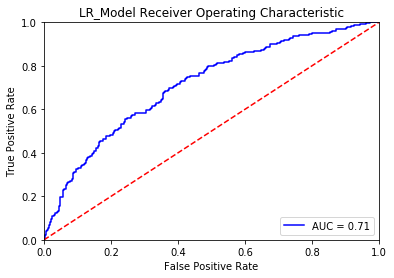

[0.8179669  0.82269504 0.81560284 0.8250591  0.81516588 0.83135392
 0.79334917 0.78859857 0.80285036 0.81235154]
0.8124993316791178
Accuracy: 0.7886255924170616


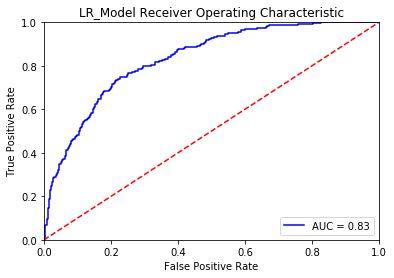

[0.8108747  0.82269504 0.78959811 0.82033097 0.81279621 0.847981
 0.78622328 0.78859857 0.79334917 0.81235154]
0.8084798589443076
Accuracy: 0.7990521327014218


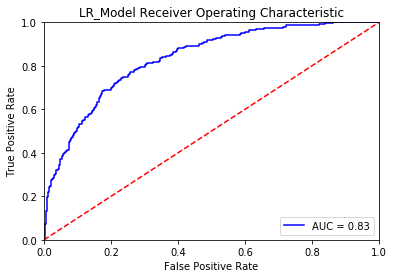

[0.82742317 0.82978723 0.8179669  0.82978723 0.83886256 0.85273159
 0.81947743 0.81235154 0.81235154 0.81710214]
0.825784135003027
Accuracy: 0.7943127962085308


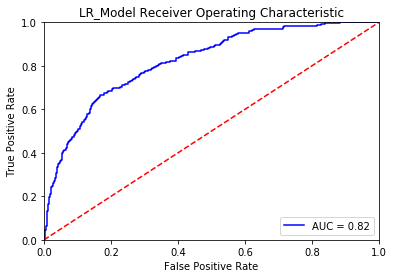

[0.8250591  0.8108747  0.79905437 0.82742317 0.81516588 0.85273159
 0.82185273 0.79334917 0.81710214 0.80522565]
0.8167838506955315
Accuracy: 0.804739336492891


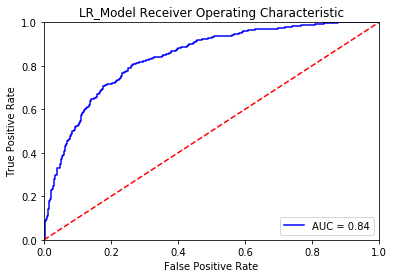

In [77]:
#Logistic regression
LR_Model = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter = 10000)

features = [variance_features, Chi2_features, RandomForest_features_list, RFE_features,all_features]

for feature in features:

    #CV score
    CV_scores = cross_val_score(LR_Model, X_train[feature], y_train, cv=10,scoring='accuracy')
    print(CV_scores)
    print(CV_scores.mean())

    #Predict test set
    LR_Model.fit(X_train[feature], y_train)
    LR_Predict = LR_Model.predict(X_test[feature])
    LR_Accuracy = accuracy_score(y_test, LR_Predict)
    print("Accuracy: " + str(LR_Accuracy))

    # calculate the fpr and tpr for all thresholds of the classification
    probs = LR_Model.predict_proba(X_test[feature])
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('LR_Model Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


[0.72813239 0.74231678 0.71631206 0.73522459 0.74407583 0.7695962
 0.73396675 0.72209026 0.72209026 0.73634204]
0.7350147155675559
Accuracy: 0.7355450236966825


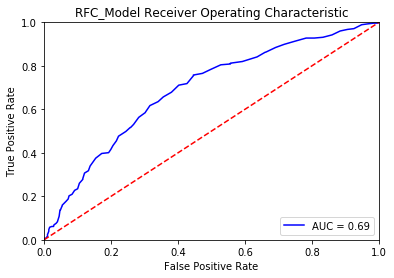

[0.78723404 0.79196217 0.8108747  0.79905437 0.76540284 0.78147268
 0.80047506 0.73871734 0.78147268 0.75534442]
0.7812010324383329
Accuracy: 0.7800947867298578


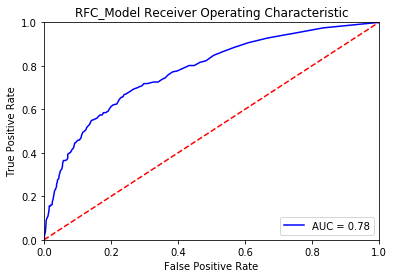

[0.79669031 0.8179669  0.78723404 0.81560284 0.80094787 0.83610451
 0.78622328 0.79097387 0.81947743 0.77434679]
0.8025567847869436
Accuracy: 0.7990521327014218


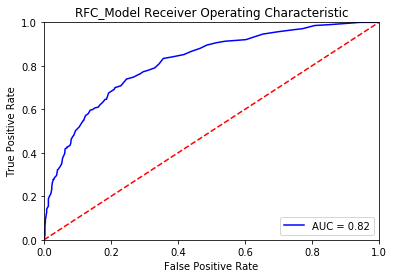

[0.79196217 0.81323877 0.80614657 0.77541371 0.77488152 0.82422803
 0.79334917 0.74584323 0.77672209 0.79809976]
0.7899885026187135
Accuracy: 0.776303317535545


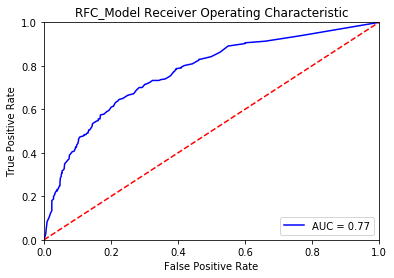

[0.80141844 0.83451537 0.79905437 0.82033097 0.8056872  0.82185273
 0.81710214 0.77909739 0.80047506 0.80047506]
0.8080008728024553
Accuracy: 0.7943127962085308


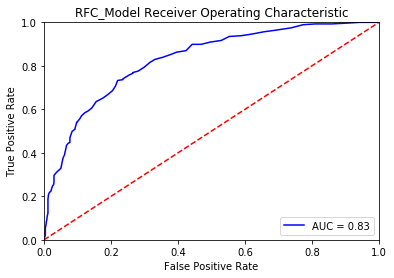

In [78]:
#Random Forest Classifier
RFC_Model = RandomForestClassifier(n_estimators=100)

for feature in features:
    #CV score
    CV_scores = cross_val_score(RFC_Model, X_train[feature], y_train, cv=10)
    print(CV_scores)
    print(CV_scores.mean())

    #Predict test set
    RFC_Model.fit(X_train[feature], y_train)
    RFC_Predict = RFC_Model.predict(X_test[feature])
    RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
    print("Accuracy: " + str(RFC_Accuracy))

    # calculate the fpr and tpr for all thresholds of the classification
    probs = RFC_Model.predict_proba(X_test[feature])
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('RFC_Model Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [20]:
#KNN Classifier, 
KNN_accuracy = []
for i in range(1,20):
    KNN_Model = KNeighborsClassifier(n_neighbors=i)

    #CV score
    CV_scores = cross_val_score(KNN_Model, X_train, y_train, cv=10)
    KNN_accuracy.append(CV_scores.mean())
print(KNN_accuracy) 

#Predict test set
KNN_Model = KNeighborsClassifier(n_neighbors=7)
KNN_Model.fit(X_train, y_train)

KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

[0.62549619482241, 0.7022929294405109, 0.659626339632409, 0.702063253268159, 0.6835713447212284, 0.706574636785398, 0.6949598372748763, 0.7148707670338392, 0.705146654950526, 0.7174729151402404, 0.711548712588435, 0.7212672146352332, 0.7091790416806818, 0.7151071683306094, 0.7103655697262203, 0.7186611238015568, 0.713206370595659, 0.7179429220300997, 0.7139094202120408]
Accuracy: 0.7023696682464455


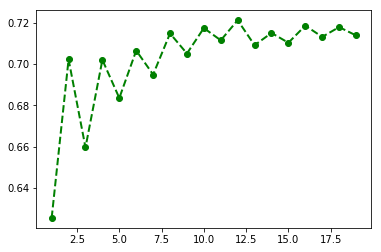

In [21]:
x=[i for i in range(1,20)]
plt.plot(x,KNN_accuracy , 'go--', linewidth=2)

[0.62549619482241, 0.7022929294405109, 0.659626339632409, 0.702063253268159, 0.6835713447212284, 0.706574636785398, 0.6949598372748763, 0.7148707670338392, 0.705146654950526, 0.7174729151402404, 0.711548712588435, 0.7212672146352332, 0.7091790416806818, 0.7151071683306094, 0.7103655697262203, 0.7186611238015568, 0.713206370595659, 0.7179429220300997, 0.7139094202120408, 0.7212672146352332, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.6949598372748763, 0.7160511062084501]
Accuracy: 0.6900473933649289


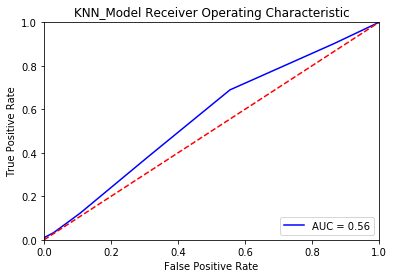

[0.62549619482241, 0.7022929294405109, 0.659626339632409, 0.702063253268159, 0.6835713447212284, 0.706574636785398, 0.6949598372748763, 0.7148707670338392, 0.705146654950526, 0.7174729151402404, 0.711548712588435, 0.7212672146352332, 0.7091790416806818, 0.7151071683306094, 0.7103655697262203, 0.7186611238015568, 0.713206370595659, 0.7179429220300997, 0.7139094202120408, 0.7212672146352332, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.6949598372748763, 0.7160511062084501, 0.7923581708651589]
Accuracy: 0.7734597156398104


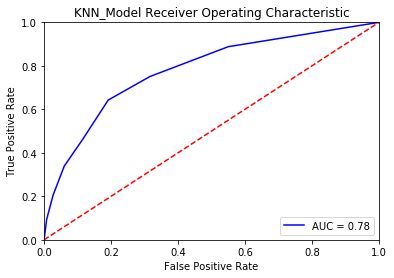

[0.62549619482241, 0.7022929294405109, 0.659626339632409, 0.702063253268159, 0.6835713447212284, 0.706574636785398, 0.6949598372748763, 0.7148707670338392, 0.705146654950526, 0.7174729151402404, 0.711548712588435, 0.7212672146352332, 0.7091790416806818, 0.7151071683306094, 0.7103655697262203, 0.7186611238015568, 0.713206370595659, 0.7179429220300997, 0.7139094202120408, 0.7212672146352332, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.6949598372748763, 0.7160511062084501, 0.7923581708651589, 0.6978062641486759]
Accuracy: 0.7061611374407583


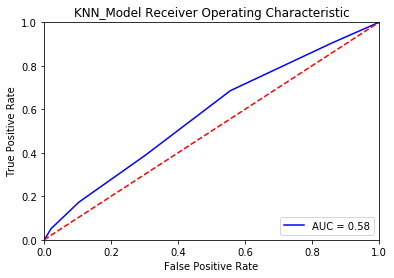

[0.62549619482241, 0.7022929294405109, 0.659626339632409, 0.702063253268159, 0.6835713447212284, 0.706574636785398, 0.6949598372748763, 0.7148707670338392, 0.705146654950526, 0.7174729151402404, 0.711548712588435, 0.7212672146352332, 0.7091790416806818, 0.7151071683306094, 0.7103655697262203, 0.7186611238015568, 0.713206370595659, 0.7179429220300997, 0.7139094202120408, 0.7212672146352332, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.6949598372748763, 0.7160511062084501, 0.7923581708651589, 0.6978062641486759, 0.8075218680314491]
Accuracy: 0.7819905213270142


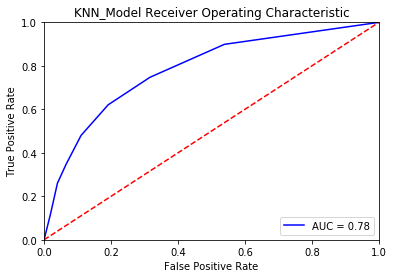

[0.62549619482241, 0.7022929294405109, 0.659626339632409, 0.702063253268159, 0.6835713447212284, 0.706574636785398, 0.6949598372748763, 0.7148707670338392, 0.705146654950526, 0.7174729151402404, 0.711548712588435, 0.7212672146352332, 0.7091790416806818, 0.7151071683306094, 0.7103655697262203, 0.7186611238015568, 0.713206370595659, 0.7179429220300997, 0.7139094202120408, 0.7212672146352332, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.7160511062084501, 0.8039572553540386, 0.6987490816159981, 0.8077571595629314, 0.6949598372748763, 0.7160511062084501, 0.7923581708651589, 0.6978062641486759, 0.8075218680314491, 0.6949598372748763]
Accuracy: 0.7023696682464455


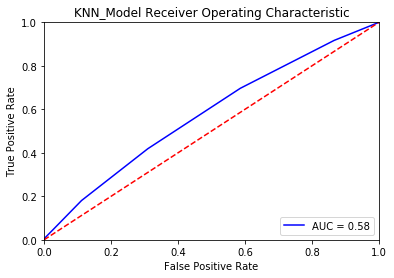

In [79]:
#Random Forest Classifier
KNN_Model = KNeighborsClassifier(n_neighbors=12)

for feature in features:
    #CV score
    CV_scores = cross_val_score(KNN_Model, X_train[feature], y_train, cv=10)
    KNN_accuracy.append(CV_scores.mean())
    print(KNN_accuracy) 

    #Predict test set
    KNN_Model = KNeighborsClassifier(n_neighbors=7)
    KNN_Model.fit(X_train[feature], y_train)

    KNN_Predict = KNN_Model.predict(X_test[feature])
    KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
    print("Accuracy: " + str(KNN_Accuracy))
    
    # calculate the fpr and tpr for all thresholds of the classification
    probs = KNN_Model.predict_proba(X_test[feature])
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('KNN_Model Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[0.72104019 0.73758865 0.76832151 0.76832151 0.73459716 0.75534442
 0.72209026 0.75059382 0.73159145 0.75296912]
0.7442458097644601
Accuracy: 0.7402843601895734


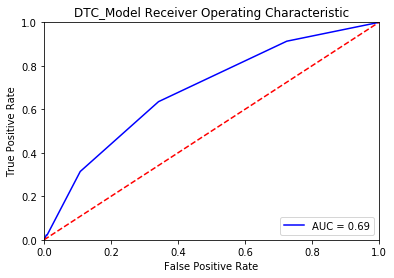

[0.78014184 0.80614657 0.80851064 0.82269504 0.78672986 0.81235154
 0.77672209 0.79334917 0.78384798 0.79572447]
0.7966219197060596
Accuracy: 0.7914691943127962


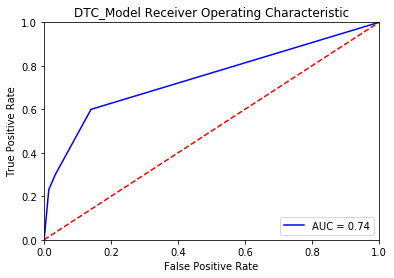

[0.78014184 0.80614657 0.8108747  0.8250591  0.78672986 0.81235154
 0.77909739 0.79097387 0.77909739 0.79572447]
0.7966196735624075
Accuracy: 0.7924170616113744


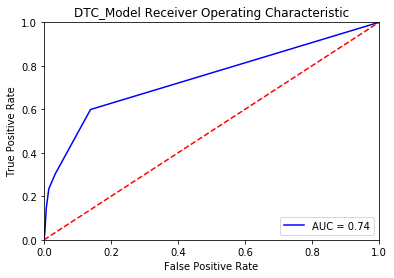

[0.78014184 0.80614657 0.80851064 0.82269504 0.78672986 0.81235154
 0.77672209 0.78622328 0.78384798 0.79572447]
0.7959093306324254
Accuracy: 0.7876777251184834


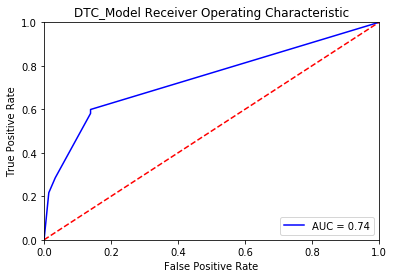

[0.78014184 0.80614657 0.8108747  0.82269504 0.78672986 0.81235154
 0.77909739 0.78859857 0.77909739 0.79572447]
0.7961457372518107
Accuracy: 0.790521327014218


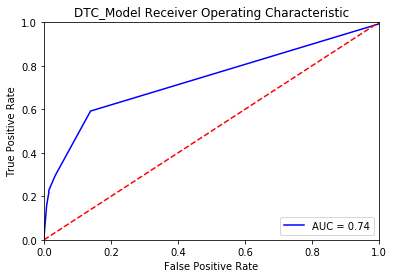

In [80]:
#DecisionTree Classifier
DTC_Model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

for feature in features:
    #CV score
    CV_scores = cross_val_score(DTC_Model, X_train[feature], y_train, cv=10)
    print(CV_scores)
    print(CV_scores.mean())

    #Predict test set
    DTC_Model.fit(X_train[feature], y_train)

    DTC_Predict = DTC_Model.predict(X_test[feature])
    DTC_Accuracy = accuracy_score(y_test, DTC_Predict)
    print("Accuracy: " + str(DTC_Accuracy))

    # calculate the fpr and tpr for all thresholds of the classification
    probs = DTC_Model.predict_proba(X_test[feature])
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('DTC_Model Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[0.72576832 0.72576832 0.72576832 0.72576832 0.72511848 0.72684086
 0.72684086 0.72684086 0.72684086 0.72684086]
0.7262396044998775
Accuracy: 0.7374407582938388


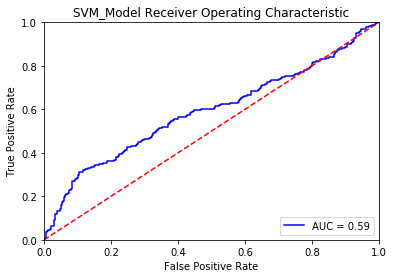

[0.8179669  0.81323877 0.8108747  0.83451537 0.80094787 0.82660333
 0.79334917 0.80522565 0.79572447 0.80047506]
0.8098921284188455
Accuracy: 0.781042654028436


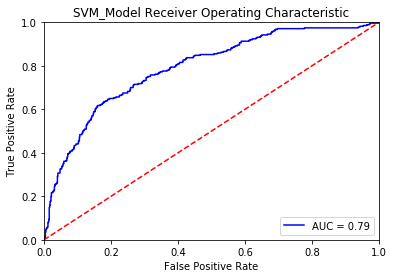

[0.72576832 0.72576832 0.72576832 0.72576832 0.72511848 0.72684086
 0.72684086 0.72684086 0.72684086 0.72684086]
0.7262396044998775
Accuracy: 0.7374407582938388


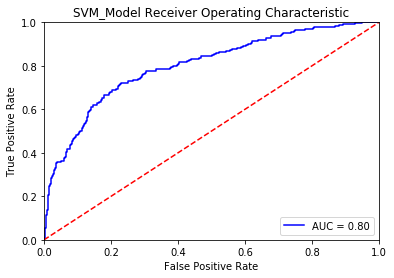

[0.8250591  0.81560284 0.81560284 0.83687943 0.81990521 0.847981
 0.80522565 0.80760095 0.80760095 0.81710214]
0.8198560110144072
Accuracy: 0.7933649289099526


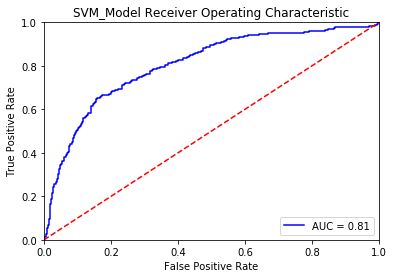

[0.72576832 0.72576832 0.72576832 0.72576832 0.72511848 0.72684086
 0.72684086 0.72684086 0.72684086 0.72684086]
0.7262396044998775
Accuracy: 0.7374407582938388


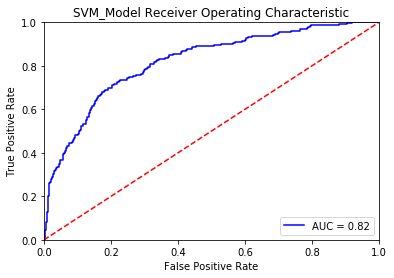

In [82]:
#SVM Classifier 
#to test different kernels = ['linear', 'rbf', 'sigmoid']
SVM_Model = svm.SVC(C=2,kernel='rbf',gamma='scale',decision_function_shape='ovr',probability=True)

for feature in features:
    #CV score
    CV_scores = cross_val_score(SVM_Model, X_train[feature], y_train, cv=10)
    print(CV_scores)
    print(CV_scores.mean())

    #Predict test set
    SVM_Model.fit(X_train[feature], y_train)

    SVM_Predict = SVM_Model.predict(X_test[feature])
    SVM_Accuracy = accuracy_score(y_test, SVM_Predict)
    print("Accuracy: " + str(SVM_Accuracy))

    # calculate the fpr and tpr for all thresholds of the classification
    probs = SVM_Model.predict_proba(X_test[feature])
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('SVM_Model Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[0.73286052 0.73522459 0.74231678 0.73995272 0.73933649 0.75771971
 0.71733967 0.72921615 0.72921615 0.72446556]
0.7347648347475655
Accuracy: 0.7649289099526067


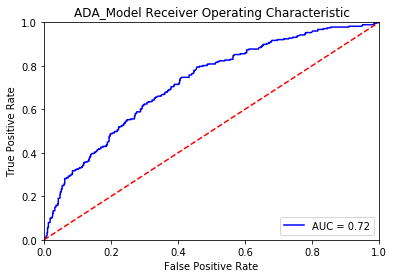

[0.83451537 0.8108747  0.8108747  0.8392435  0.82701422 0.83847981
 0.79572447 0.78622328 0.79809976 0.80997625]
0.8151026055186525
Accuracy: 0.795260663507109


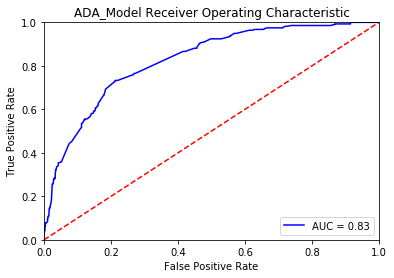

[0.82742317 0.79196217 0.79432624 0.80614657 0.83175355 0.83610451
 0.78147268 0.78147268 0.80285036 0.80285036]
0.8056362304354966
Accuracy: 0.7876777251184834


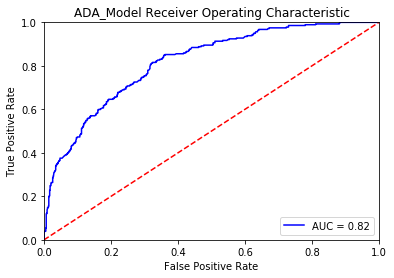

[0.82742317 0.81323877 0.8108747  0.83451537 0.82227488 0.85035629
 0.80285036 0.7672209  0.80760095 0.81710214]
0.8153457532303019
Accuracy: 0.7914691943127962


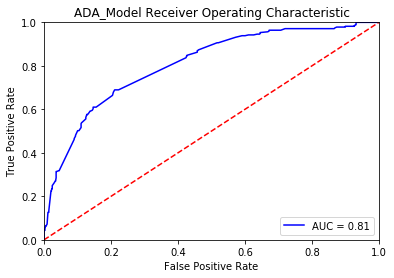

[0.82033097 0.78959811 0.80378251 0.8108747  0.81990521 0.83610451
 0.79809976 0.78147268 0.80285036 0.81472684]
0.8077745658455815
Accuracy: 0.7829383886255924


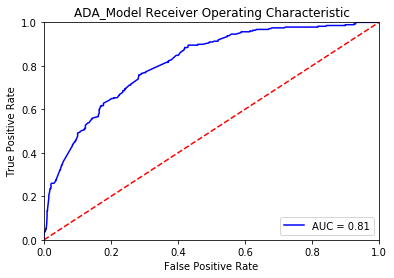

In [83]:
#Adaboosting Classifier
ADA_Model = AdaBoostClassifier(n_estimators=50,learning_rate=1)

for feature in features:
    #CV score
    CV_scores = cross_val_score(ADA_Model, X_train[feature], y_train, cv=10)
    print(CV_scores)
    print(CV_scores.mean())

    #Predict test set
    ADA_Model.fit(X_train[feature], y_train)

    ADA_Predict = ADA_Model.predict(X_test[feature])
    ADA_Accuracy = accuracy_score(y_test, ADA_Predict)
    print("Accuracy: " + str(ADA_Accuracy))

    # calculate the fpr and tpr for all thresholds of the classification
    probs = ADA_Model.predict_proba(X_test[feature])
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('ADA_Model Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
#LDA Classifier 
#Need to define number of components
LDA_Model = LinearDiscriminantAnalysis(n_components=2)

for feature in features:
    #CV score
    CV_scores = cross_val_score(LDA_Model, X_train[feature], y_train, cv=10)
    print(CV_scores)
    print(CV_scores.mean())

    #Predict test set
    LDA_Model.fit(X_train[feature], y_train)

    LDA_Predict = LDA_Model.predict(X_test[feature])
    LDA_Accuracy = accuracy_score(y_test, LDA_Predict)
    print("Accuracy: " + str(LDA_Accuracy))
    
    # calculate the fpr and tpr for all thresholds of the classification
    probs = LDA_Model.predict_proba(X_test[feature])
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('LDA_Model Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()